<h1 style="font-size:2em">Projet 6 - Classifiez automatiquement des biens de consommation</h1>


# Objectifs

- Elargir notre gamme de produits, en particulier dans l’épicerie fine. 
- Collecte de produits à base de “champagne” via une l’API 
- Extraction des 10 premiers produits dans un fichier “.csv”, 
    - Chaque produit aura les données suivantes : foodId, label, category, foodContentsLabel, image."

API: https://rapidapi.com/edamam/api/edamam-food-and-grocery-database

# Imports et configs

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)

# Définir la stratégie de collecte de données en recensant les API disponibles, et réaliser la collecte des données répondant à des critères définis via une API (interface de programmation) en prenant en compte les normes RGPD, afin de les exploiter pour l’élaboration d’un modèle.

## CE1 Vous avez défini votre stratégie de collecte de données et recensé les API disponibles pour le besoin de votre projet

Stratégie: Code python  
API : https://rapidapi.com/edamam/api/edamam-food-and-grocery-database

## CE2 Vous avez écrit et testé une requête pour obtenir les données via l’API.

Il faut d'abord s'abonner à cet API (Basic):

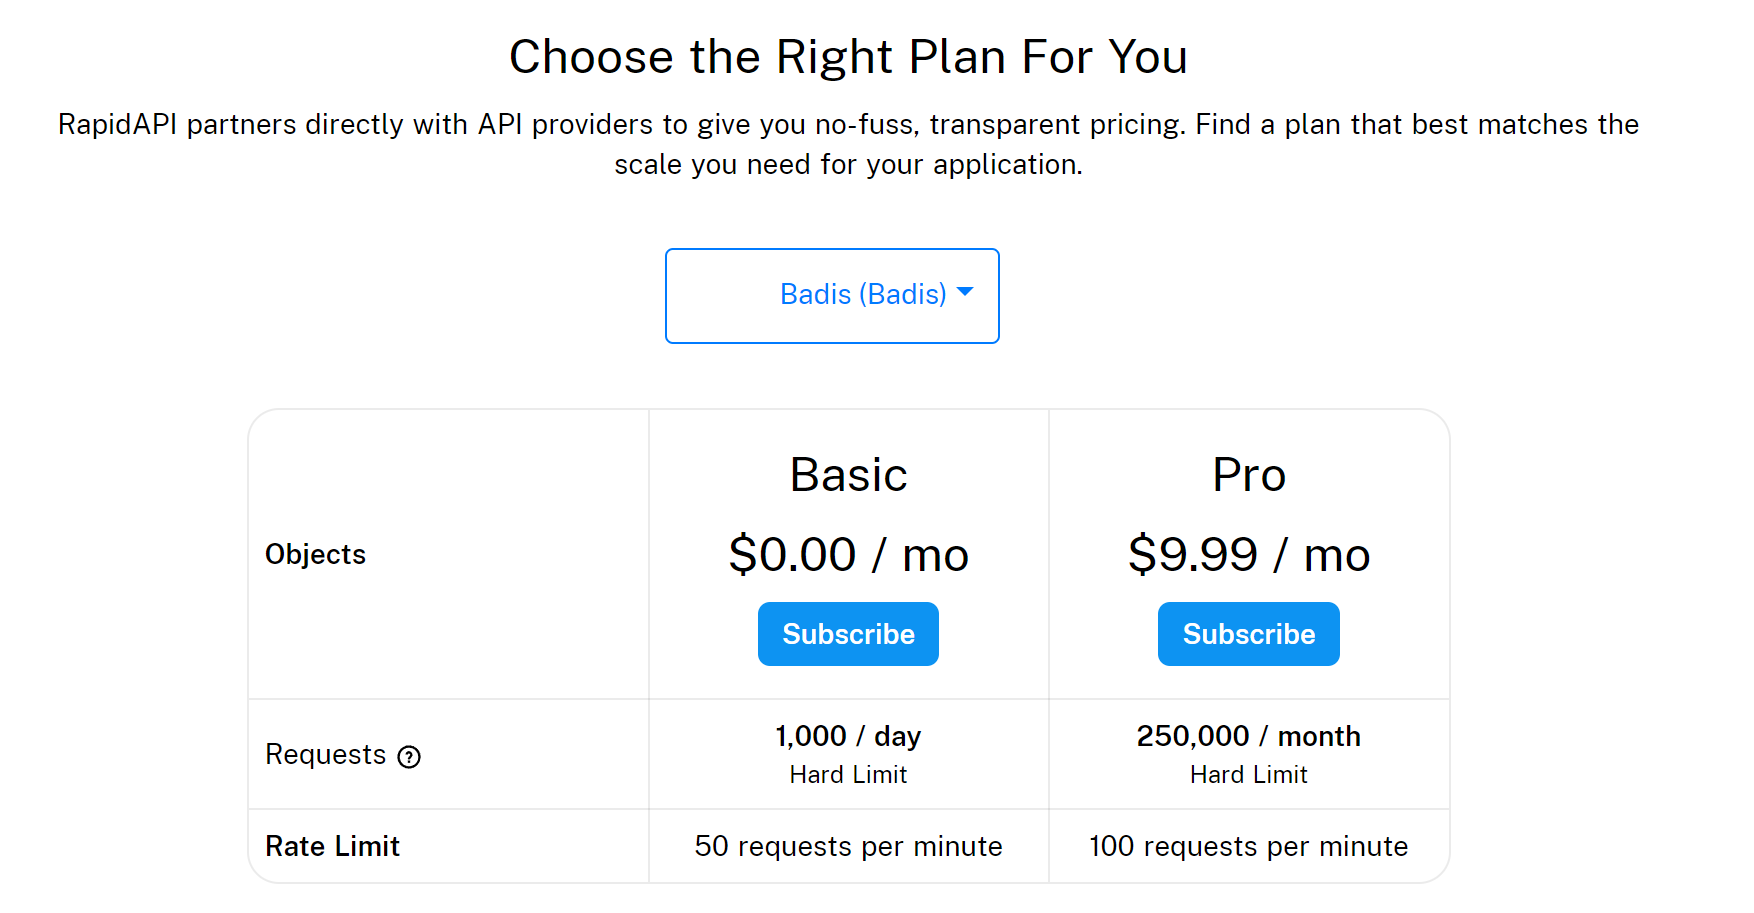

On peut s'inspirer du Code Snippets python fourni par le site

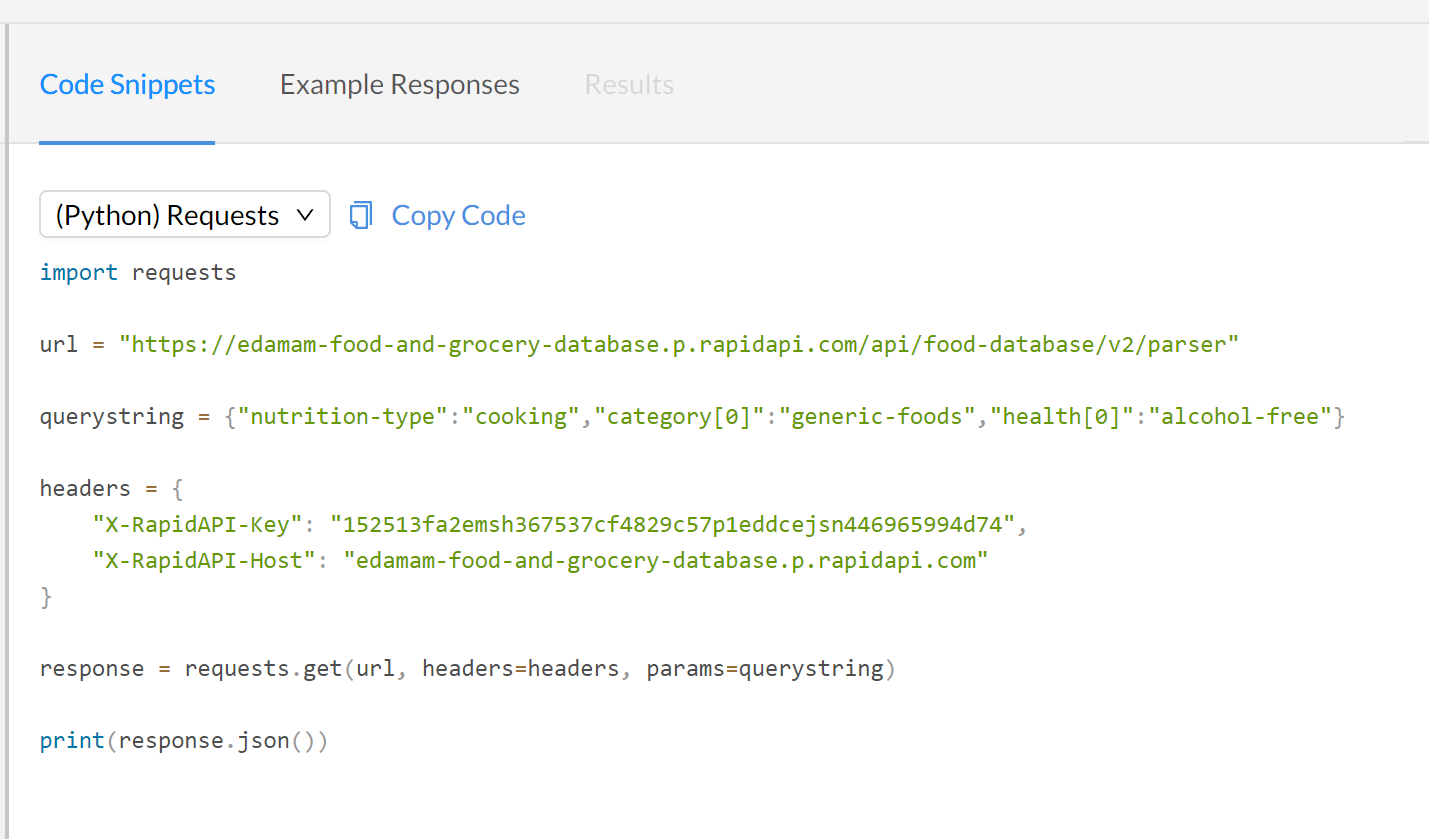

On va obtenir les données (data) de l'API en cherchant spécifiquement le champagne comme ingrédient:

In [18]:
url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser"

# Le champ "ingr" est typiquement utilisé pour indiquer l'ingrédient à chercher.
querystring = {
	"ingr": "champagne",
}

headers = {
	"X-RapidAPI-Key": "152513fa2emsh367537cf4829c57p1eddcejsn446965994d74",
	"X-RapidAPI-Host": "edamam-food-and-grocery-database.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()

## CE3 Vous avez récupéré les seuls champs nécessaires. Dans le cadre de ce projet, comme indiqué dans l’énoncé, il s’agit de :  Des champs foodId, label, category, foodContentsLabel, image

In [26]:
data = response.json()
filtered_data = []

if "hints" in data:
    for item in data["hints"]:
        food_data = item.get('food', {})
        relevant_info = {
            'foodId': food_data.get('foodId'),
            'label': food_data.get('label'),
            'category': food_data.get('category'),
            'foodContentsLabel': food_data.get('foodContentsLabel'),
            'image': food_data.get('image')
        }
        filtered_data.append(relevant_info)

## CE4 Vous avez appliqué au moins un filtre sur un des champs nécessaires pour ne collecter que les données ayant les valeurs correspondantes sur ce ou ces champs. Dans le cadre de ce projet, comme indiqué dans l’énoncé, il s’agit de :  de filtrer sur l’ingrédient (“ingr”) champagne.

Cela a déja été effectué dans CE2 

## CE5 Vous avez stocké les données collectées via l’API dans un fichier utilisable (ex. : fichier CSV ou pickle).

On ne va récupérer que les 10 premiers produits

In [29]:
import csv

# Écriture des données filtrées dans un fichier CSV
with open('champagne_data.csv', 'w', newline='') as csvfile:
    fieldnames = ["foodId", "label", "category", "foodContentsLabel", "image"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    # Prendre seulement les 10 premiers éléments de la liste
    for row in filtered_data[:10]:
        writer.writerow(row)

On peut rapidement vérifier a quoi ressemble le résultat final

In [30]:
df = pd.read_csv('champagne_data.csv', sep = ",")

In [31]:
df

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,NaN,https://www.edamam.com/food-img/a71/a718cf3c52...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,NaN
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,NaN
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,NaN
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,sugar; butter; shortening; vanilla; champagne;...,NaN
7,food_byap67hab6evc3a0f9w1oag3s0qf,Champagne Sorbet,Generic meals,Sugar; Lemon juice; brandy; Champagne; Peach,NaN
8,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,butter; cocoa; sweetened condensed milk; vanil...,NaN
9,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,champagne vinegar; olive oil; Dijon mustard; s...,NaN


## CE6 Vous avez veillé au respect des normes RGPD dans toutes phases de la collecte et du stockage des données. En particulier : présenter les 5 grands principes du RGPD et ne gérer que les données nécessaires pour la finalité du projet  

**Règlement Général sur la Protection des Données (RGPD):** Règlement de l'Union européenne qui vise à renforcer la protection des données pour les individus au sein de l'Union européenne

**Les 5 grands principes du RGPD sont:**

- **Principe de licéité, loyauté et transparence:** Les données personnelles doivent être traitées de manière licite, loyale et transparente vis-à-vis de la personne concernée.
- **Principe de limitation des finalités:** Les données sont collectées à des fins spécifiques, explicites et légitimes et ne sont pas traitées ultérieurement d'une manière incompatible avec ces finalités.
- **Principe de minimisation des données:** Seules les données pertinentes, adéquates et limitées à ce qui est nécessaire par rapport aux finalités pour lesquelles elles sont traitées doivent être collectées.
- **Principe d'exactitude:** Les données doivent être exactes et, si nécessaire, mises à jour. Il convient de prendre toutes les mesures raisonnables pour effacer ou rectifier les données inexactes.
- **Principe de limitation de la conservation:** Les données ne doivent pas être conservées plus longtemps que nécessaire au regard des finalités pour lesquelles elles sont traitées.

**Pour ce projet, voici comment ces principes peuvent être appliqués:**

- **Licéité, loyauté et transparence:** L'API m'a donné le droit de récupérer ces données et j'ai été transparent sur l'utilisation que j'allais en faire (lors du Sign up)
- **Limitation des finalités:** Ce projet se concentre sur la collecte de données sur certains aliments (champagne) et non tous.
- **Minimisation des données:** Respecté car j'ai filtré les données pour ne récupérer que les champs nécessaires (foodId, label, category, foodContentsLabel, image)
- **Exactitude:** Étant donné que je récupere des données directement depuis l'API, on peut supposer qu'elles sont exactes
- **Limitation de la conservation:** Je conserve ces données uniquement pour la durée du projet. 